# **Chennai Housing Price Predictor**

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
data=pd.read_csv("train.csv")
data.head(10)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,AGE_OF_PROP
0,P03210,Karapakkam,1004,4/5/2011,131,1.0,1.0,3,AbNormal,Yes,...,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,16060
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,4015
2,P01812,Adyar,909,4/2/2012,70,1.0,1.0,3,AbNormal,Yes,...,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,7300
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,8030
4,P06210,Karapakkam,1226,5/10/2009,84,1.0,1.0,3,AbNormal,Yes,...,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,10950
5,P00219,Chrompet,1220,11/9/2014,36,2.0,1.0,4,Partial,No,...,No Access,RH,4.5,2.6,3.1,3.320,409027,198316,12394750,1825
6,P09105,Chrompet,1167,5/4/2007,137,1.0,1.0,3,Partial,No,...,No Access,RL,3.6,2.1,2.5,2.670,263152,33955,8488790,10220
7,P09679,Velachery,1847,13-03-2006,176,3.0,2.0,5,Family,No,...,Gravel,RM,2.4,4.5,2.1,3.260,604809,235204,16800250,3650
8,P03377,Chrompet,771,6/4/2011,175,1.0,1.0,2,AdjLand,No,...,Paved,RM,2.9,3.7,4.0,3.550,257578,33236,8308970,12410
9,P09623,Velachery,1635,22-06-2006,74,2.0,1.0,4,AbNormal,No,...,No Access,I,3.1,3.1,3.3,3.160,323346,121255,8083650,5475


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [70]:
data.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,AGE_OF_PROP
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03,7109.000000
mean,1382.073006,99.603179,1.637310,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07,8866.486144
std,457.410902,57.403110,0.803029,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06,4504.832249
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06,1460.000000
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06,5110.000000
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07,8395.000000
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07,12410.000000
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07,20075.000000


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


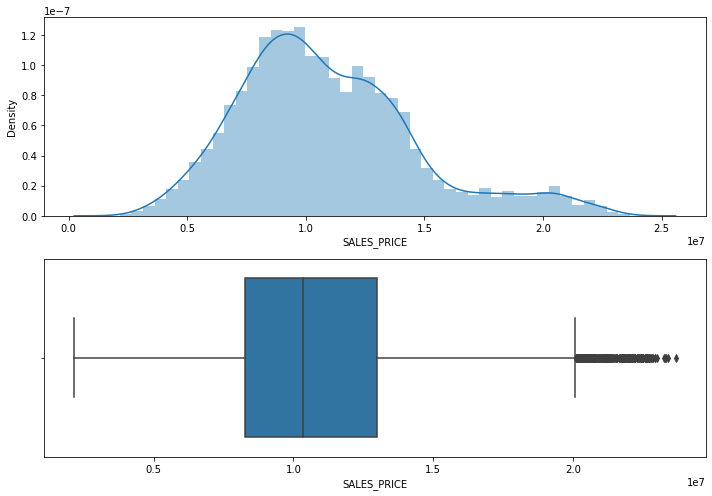

In [71]:
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(data['SALES_PRICE'])
fig.add_subplot(2,1,2)
sns.boxplot(data['SALES_PRICE'])
plt.tight_layout()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='INT_SQFT', ylabel='SALES_PRICE'>

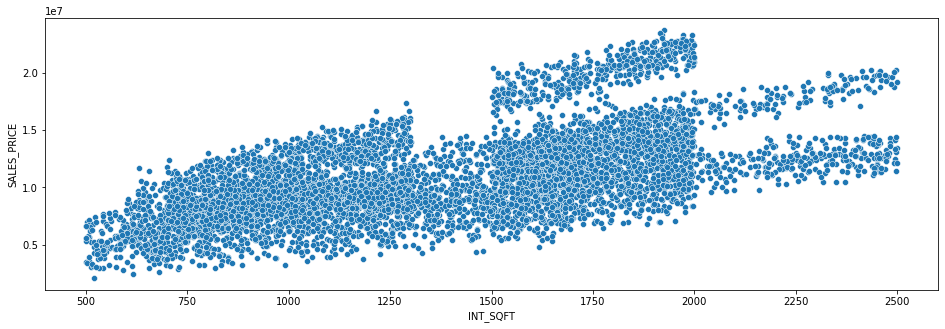

In [72]:
fig = plt.figure(figsize=(16,5))
sns.scatterplot(data['INT_SQFT'],data['SALES_PRICE'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='N_ROOM', ylabel='count'>

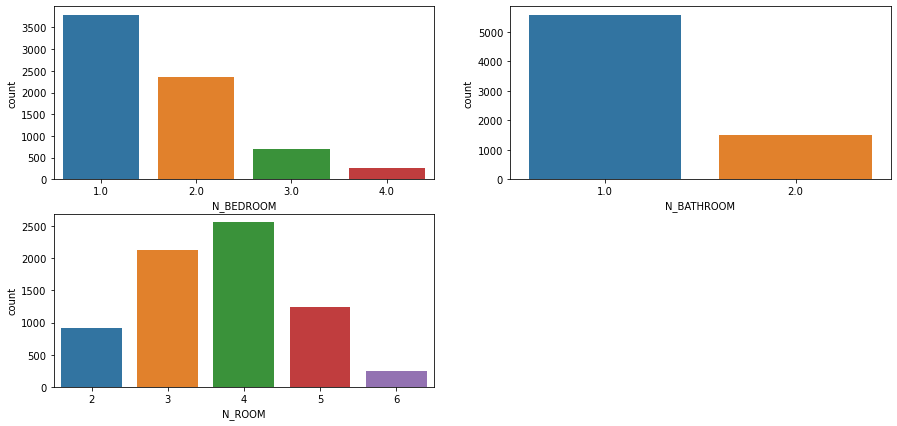

In [73]:
fig = plt.figure(figsize=(15,7))
fig.add_subplot(2,2,1)
sns.countplot(data['N_BEDROOM'])
fig.add_subplot(2,2,2)
sns.countplot(data['N_BATHROOM'])
fig.add_subplot(2,2,3)
sns.countplot(data['N_ROOM'])

<AxesSubplot:xlabel='year'>

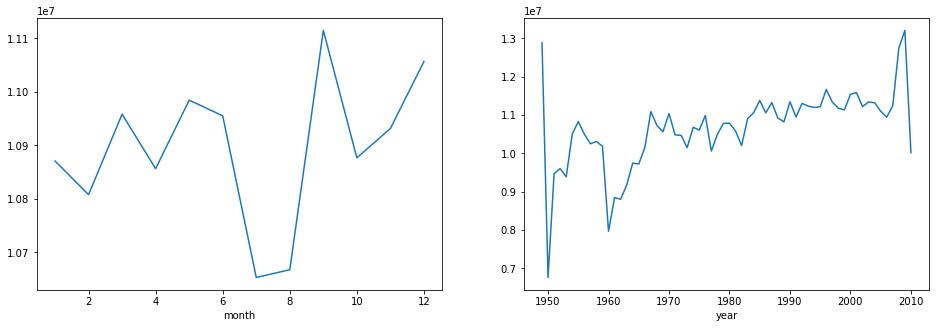

In [74]:
data['DATE_BUILD'] =  pd.to_datetime(data['DATE_BUILD'])
data['month'] = data['DATE_BUILD'].apply(lambda date:date.month)
data['year'] =  data['DATE_BUILD'].apply(lambda date:date.year)

fig = plt.figure(figsize=(16,5))
fig.add_subplot(1,2,1)
data.groupby('month').mean()['SALES_PRICE'].plot()
fig.add_subplot(1,2,2)
data.groupby('year').mean()['SALES_PRICE'].plot()

In [75]:
data=data.drop(["month","year"],axis=1)
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,AGE_OF_PROP
0,P03210,Karapakkam,1004,4/5/2011,131,1.0,1.0,3,AbNormal,Yes,...,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,16060
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,4015
2,P01812,Adyar,909,4/2/2012,70,1.0,1.0,3,AbNormal,Yes,...,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,7300
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,8030
4,P06210,Karapakkam,1226,5/10/2009,84,1.0,1.0,3,AbNormal,Yes,...,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,10950


# **DATA PREPROCESSING**

In [76]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

In [77]:
print(data["AREA"].unique())
print(data["AREA"].value_counts())

['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'T Nagar']
Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64


In [78]:
print(data["UTILITY_AVAIL"].unique())
print(data["UTILITY_AVAIL"].value_counts())

['AllPub' 'ELO' 'NoSewr ' 'NoSeWa']
AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64


In [79]:
print(data["STREET"].unique())
print(data["STREET"].value_counts())

['Paved' 'Gravel' 'No Access']
Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64


In [80]:
print(data["MZZONE"].unique())
print(data["MZZONE"].value_counts())

['A' 'RH' 'RL' 'I' 'C' 'RM']
RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64


In [81]:
print(data["BUILDTYPE"].unique())
print(data["BUILDTYPE"].value_counts())

['Commercial' 'Others' 'House']
House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64


In [82]:
print(data["SALE_COND"].unique())
print(data["SALE_COND"].value_counts())

['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale']
AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64


In [83]:
from sklearn.preprocessing import LabelEncoder
data['AREA']= LabelEncoder().fit_transform(data['AREA'])
data['UTILITY_AVAIL']= LabelEncoder().fit_transform(data['UTILITY_AVAIL'])
data['SALE_COND']= LabelEncoder().fit_transform(data['SALE_COND'])
data['BUILDTYPE']= LabelEncoder().fit_transform(data['BUILDTYPE'])
data['STREET']= LabelEncoder().fit_transform(data['STREET'])
data['MZZONE']= LabelEncoder().fit_transform(data['MZZONE'])
data['PARK_FACIL']= LabelEncoder().fit_transform(data['PARK_FACIL'])
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,AGE_OF_PROP
0,P03210,4,1004,4/5/2011,131,1.0,1.0,3,0,1,...,2,0,4.0,3.9,4.9,4.330,380000,144400,7600000,16060
1,P09411,1,1986,19-12-2006,26,2.0,1.0,5,0,0,...,0,3,4.9,4.2,2.5,3.765,760122,304049,21717770,4015
2,P01812,0,909,4/2/2012,70,1.0,1.0,3,0,1,...,0,4,4.1,3.8,2.2,3.090,421094,92114,13159200,7300
3,P05346,6,1855,13-03-2010,14,3.0,2.0,5,2,0,...,2,2,4.7,3.9,3.6,4.010,356321,77042,9630290,8030
4,P06210,4,1226,5/10/2009,84,1.0,1.0,3,0,1,...,0,1,3.0,2.5,4.1,3.290,237000,74063,7406250,10950


In [84]:
print(data["AREA"].value_counts)

<bound method IndexOpsMixin.value_counts of 0       4
1       1
2       0
3       6
4       4
       ..
7104    4
7105    6
7106    6
7107    4
7108    6
Name: AREA, Length: 7109, dtype: int32>


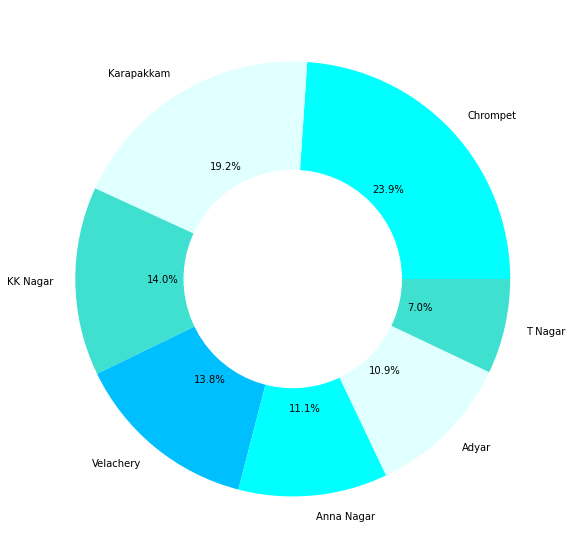

In [85]:
valuecount=data['AREA'].value_counts()
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(valuecount, labels=['Chrompet','Karapakkam','KK Nagar','Velachery','Anna Nagar','Adyar','T Nagar'], colors=['cyan','lightcyan','turquoise','deepskyblue'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [86]:
corr_matrix=data.corr()
features=corr_matrix.index

<AxesSubplot:>

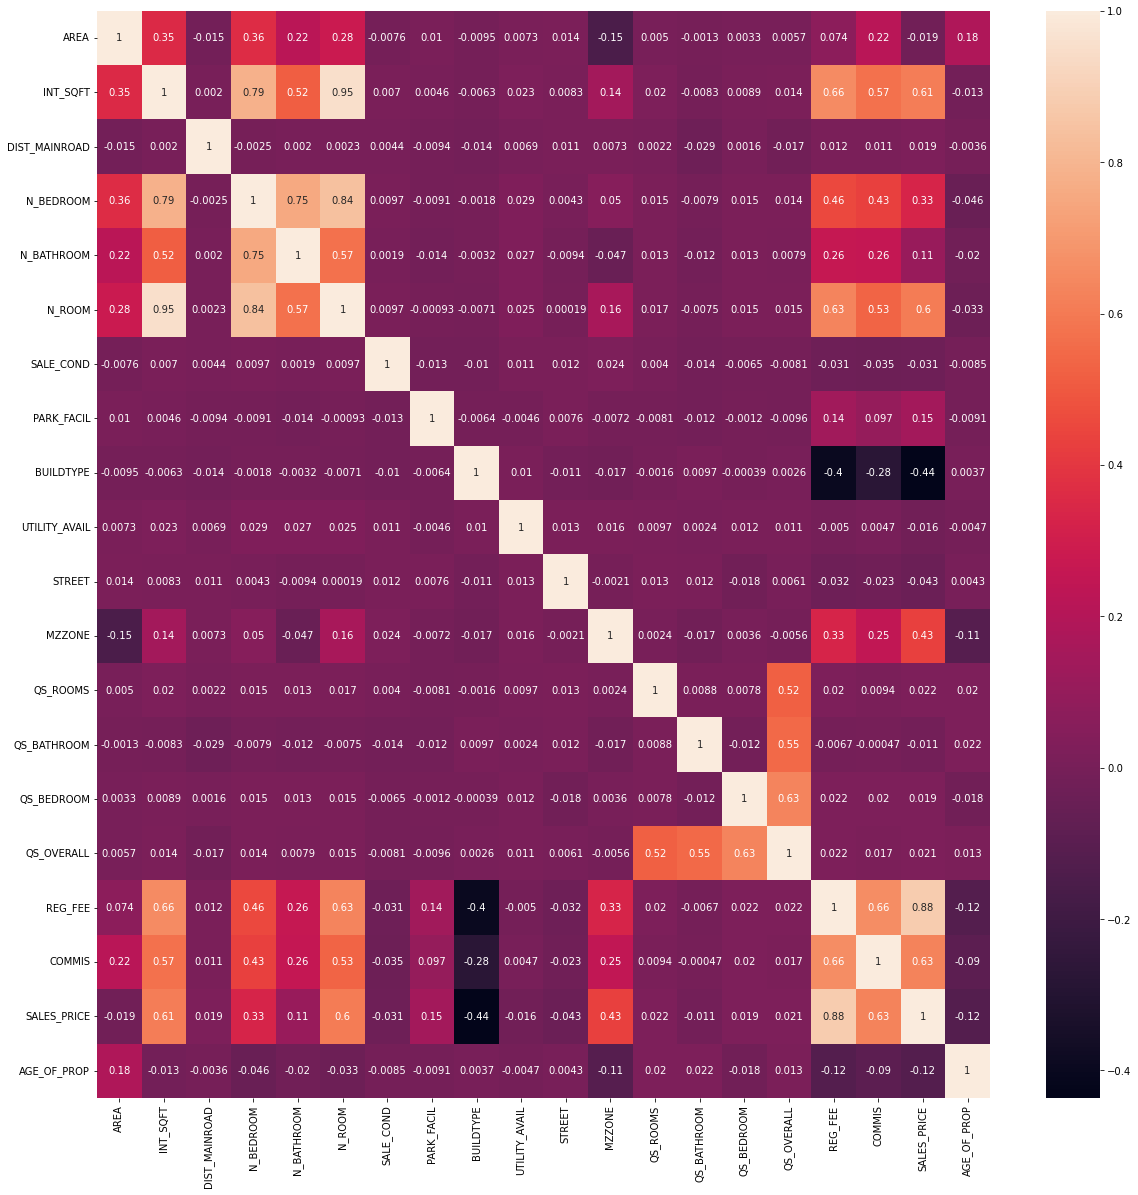

In [87]:
plt.figure(figsize=(20,20))
sns.heatmap(data[features].corr(),annot=True)

In [88]:
data = data.drop(["PRT_ID","UTILITY_AVAIL","QS_ROOMS", "QS_BATHROOM", "QS_BEDROOM", "QS_OVERALL","DATE_BUILD","DATE_SALE","REG_FEE","COMMIS"],axis = 1)
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,STREET,MZZONE,SALES_PRICE,AGE_OF_PROP
0,4,1004,131,1.0,1.0,3,0,1,0,2,0,7600000,16060
1,1,1986,26,2.0,1.0,5,0,0,0,0,3,21717770,4015
2,0,909,70,1.0,1.0,3,0,1,0,0,4,13159200,7300
3,6,1855,14,3.0,2.0,5,2,0,2,2,2,9630290,8030
4,4,1226,84,1.0,1.0,3,0,1,2,0,1,7406250,10950


In [89]:
data.isnull().sum()


AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        1
N_BATHROOM       5
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
STREET           0
MZZONE           0
SALES_PRICE      0
AGE_OF_PROP      0
dtype: int64

In [90]:
data.dropna(subset=['N_BEDROOM'],axis = 0,inplace = True)
data.isnull().sum()

AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       5
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
STREET           0
MZZONE           0
SALES_PRICE      0
AGE_OF_PROP      0
dtype: int64

In [91]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = "mean")
imputer_data = imputer.fit_transform(data[["N_BATHROOM"]])
imputer_data = pd.DataFrame(data = imputer_data, columns = ["N_BATHROOM"])
data["N_BATHROOM"] = imputer_data
data.isnull().sum()

AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       1
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
STREET           0
MZZONE           0
SALES_PRICE      0
AGE_OF_PROP      0
dtype: int64

In [92]:
data["N_BATHROOM"].fillna(method = "ffill",inplace = True)
data.isnull().sum()

AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
STREET           0
MZZONE           0
SALES_PRICE      0
AGE_OF_PROP      0
dtype: int64

In [93]:
X=data.drop(["SALES_PRICE"],axis=1)
Y=data["SALES_PRICE"]

In [94]:
X.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,STREET,MZZONE,AGE_OF_PROP
0,4,1004,131,1.0,1.0,3,0,1,0,2,0,16060
1,1,1986,26,2.0,1.0,5,0,0,0,0,3,4015
2,0,909,70,1.0,1.0,3,0,1,0,0,4,7300
3,6,1855,14,3.0,2.0,5,2,0,2,2,2,8030
4,4,1226,84,1.0,1.0,3,0,1,2,0,1,10950


In [95]:
Y.head()

0     7600000
1    21717770
2    13159200
3     9630290
4     7406250
Name: SALES_PRICE, dtype: int64

Optional Feature Selection for some more Optimization

In [96]:
from sklearn.feature_selection import mutual_info_classif
importances=mutual_info_classif(X,Y)

<AxesSubplot:>

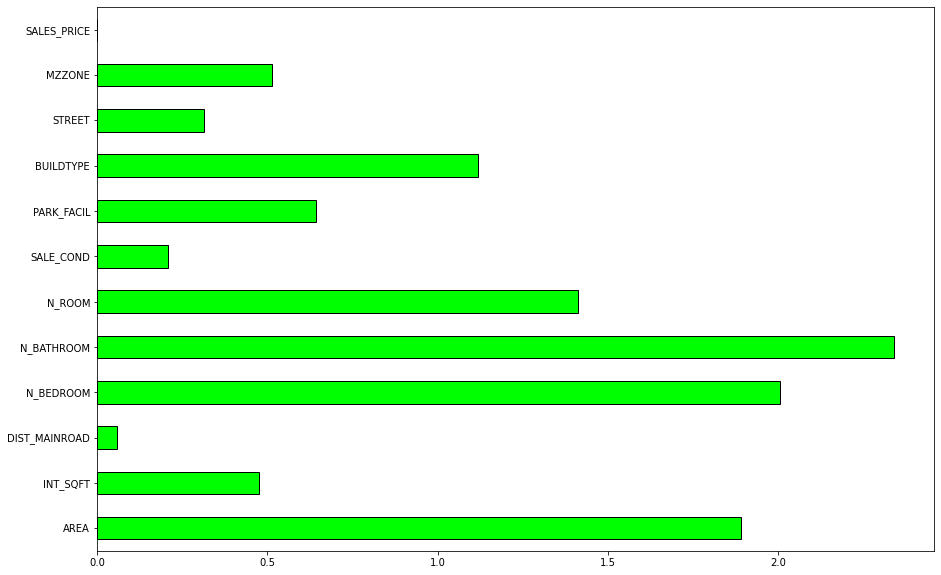

In [97]:
feat_importances=pd.Series(importances,data.columns[0:len(data.columns)-1])
feat_importances.plot(kind="barh",color="lime",figsize= (15, 10),edgecolor = "black")

# **LINEAR MODELS**

### **Multi-Variable Linear Regression**

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit,cross_val_score

In [99]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
model=LinearRegression()

In [100]:
model.fit(X_train,Y_train)

LinearRegression()

In [101]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_percentage_error,explained_variance_score
pred=model.predict(X_test)
print("Mean Absolute error in % of Linear Regressor is:",mean_absolute_percentage_error(Y_test,pred))
print("Mean Squared error of Linear Regressor is:",mean_squared_error(Y_test,pred))
print("Root Mean Squared error of Linear Regressor is:",np.sqrt(mean_squared_error(Y_test,pred)))

Mean Absolute error in % of Linear Regressor is: 0.14317847393775063
Mean Squared error of Linear Regressor is: 2989463911591.3667
Root Mean Squared error of Linear Regressor is: 1729006.625664392


In [102]:
print("R2_score of Linear Regressor is:",r2_score(Y_test,pred))

R2_score of Linear Regressor is: 0.7788823001394909


In [103]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

In [104]:
cross_val_score(LinearRegression(),X,Y,cv=cv)

array([0.78843513, 0.78460167, 0.79542023, 0.79029918, 0.79149769])

### **Random Forest Regressor**

In [105]:
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor(n_estimators=30)


In [106]:
model2.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=30)

In [107]:
pred2=model2.predict(X_test)
print("Mean Absolute error in % of Random Forest Regressor is:",mean_absolute_percentage_error(Y_test,pred2))
print("Mean Squared error of Random Forest Regressor is:",mean_squared_error(Y_test,pred2))
print("Root Mean Squared error of Random Forest Regressor is:",np.sqrt(mean_squared_error(Y_test,pred2)))

Mean Absolute error in % of Random Forest Regressor is: 0.03855630035813251
Mean Squared error of Random Forest Regressor is: 226705490404.8813
Root Mean Squared error of Random Forest Regressor is: 476135.9999043144


In [108]:
print("R2_score of Random Forest Regressor is:",r2_score(Y_test,pred2))

R2_score of Random Forest Regressor is: 0.9832315766081982


In [109]:
cv1=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

In [110]:
cross_val_score(RandomForestRegressor(),X,Y,cv=cv1)

array([0.98241442, 0.98360562, 0.98401758, 0.98458983, 0.98442282])

### **Support Vector Machine**

In [111]:
from sklearn.svm import SVR
model3=SVR(kernel="rbf")

In [112]:
model3.fit(X_train,Y_train)

SVR()

In [113]:
pred3=model3.predict(X_test)
print("Mean Absolute error in % of Support Vector Regressor is:",mean_absolute_percentage_error(Y_test,pred3))
print("Mean Squared error of Support Vector Regressor is:",mean_squared_error(Y_test,pred3))
print("Root Mean Squared error of Support Vector Regressor is:",np.sqrt(mean_squared_error(Y_test,pred3)))


Mean Absolute error in % of Support Vector Regressor is: 0.29418350262589554
Mean Squared error of Support Vector Regressor is: 13685812380522.416
Root Mean Squared error of Support Vector Regressor is: 3699434.0621941644


In [114]:
print("R2_score of Support Vector Regressor is:",r2_score(Y_test,pred3))

R2_score of Support Vector Regressor is: -0.01228027626287198


Gradient Booster

In [115]:
from sklearn.ensemble import GradientBoostingRegressor
model4=GradientBoostingRegressor(n_estimators=100)

In [116]:
model4.fit(X_train,Y_train)

GradientBoostingRegressor()

In [117]:
pred4=model4.predict(X_test)
print("Mean Absolute error in % of Support Vector Regressor is:",mean_absolute_percentage_error(Y_test,pred4))
print("Mean Squared error of Support Vector Regressor is:",mean_squared_error(Y_test,pred4))
print("Root Mean Squared error of Support Vector Regressor is:",np.sqrt(mean_squared_error(Y_test,pred4)))

Mean Absolute error in % of Support Vector Regressor is: 0.03515132509849123
Mean Squared error of Support Vector Regressor is: 228909719610.43198
Root Mean Squared error of Support Vector Regressor is: 478445.10616206744


In [118]:
print("R2_score of Support Vector Regressor is:",r2_score(Y_test,pred4))

R2_score of Support Vector Regressor is: 0.9830685393191354


In [119]:
cv3=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

In [120]:
cross_val_score(GradientBoostingRegressor(),X,Y,cv=cv3)

array([0.98496096, 0.98543888, 0.98409301, 0.98717628, 0.98560977])

### **Out of SVM (Support Vector Regressor), Random Forest Regressor and Multi-Variable Linear Regressor - Random Forest Regressor is best suited for this data.**

In [121]:
loc = ["Adyar", "Anna Nagar", "Chrompet", "KK Nagar", "Karapakkam", "T Nagar", "Velachery"]
Mzzone = ["A","C", "I", "RH","RL","RM"]
salecond = ["AbNormal", "AdjLand", "Family", "Normal Sale", "Partial"]
parkfacil = ["No", "Yes"]
buildtype = ["Commercial","House", "Others"]
street = ["Gravel","No Access","Paved"]

In [122]:
def predict_price(location,sqft,dist,bed,bath,room,sale_cond,park,build_type,Street,zone,age):
    X=np.zeros(12)
    X[0]=loc.index(location)
    X[1]=sqft
    X[2]=dist
    X[3]=bed
    X[4]=bath
    X[5]=room
    X[6]=salecond.index(sale_cond)
    X[7]=parkfacil.index(park)
    X[8]=buildtype.index(build_type)
    X[9]=street.index(Street)
    X[10]=Mzzone.index(zone)
    X[11]=age
    
    return model2.predict([X])[0]
    
    

In [123]:
predict_price('Karapakkam',1200,200,3,2,5,'Family','Yes','House','Paved','RH',10000)

7530516.666666667

In [124]:
predict_price('Chrompet',800,500,2,1,4,'AbNormal','No','Commercial','Paved','I',1200)

9354525.0

In [125]:
predict_price('T Nagar',1700,110,3,1,4,'Family','Yes','Others','Paved','RM',365)

13389321.5

In [126]:
predict_price('KK Nagar',600,200,1,1,2,'AbNormal','No','Commercial','Paved','RH',120000)

8716077.166666666

In [127]:
import pickle
with open("TARP_PROJECT(WEBSITE).pickle","wb") as f:
    pickle.dump(model2,f)

In [128]:
location = [i.lower() for i in loc]
Mzzone = [i.lower() for i in Mzzone]
salecond = [i.lower() for i in salecond]
parkfacil = [i.lower() for i in parkfacil]
buildtype = [i.lower() for i in buildtype]
street = [i.lower() for i in street]
li = ["sqft","dist","bed","bath","room"]+location+Mzzone+salecond+parkfacil+buildtype+street
li

['sqft',
 'dist',
 'bed',
 'bath',
 'room',
 'adyar',
 'anna nagar',
 'chrompet',
 'kk nagar',
 'karapakkam',
 't nagar',
 'velachery',
 'a',
 'c',
 'i',
 'rh',
 'rl',
 'rm',
 'abnormal',
 'adjland',
 'family',
 'normal sale',
 'partial',
 'no',
 'yes',
 'commercial',
 'house',
 'others',
 'gravel',
 'no access',
 'paved']

In [129]:
import json
columns={ 
    'data_columns' : li
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))

In [130]:
import joblib
joblib.dump(model2 , 'TARP_PROJECT(WEBSITE).jlib')

['TARP_PROJECT(WEBSITE).jlib']